In [37]:
# Connect with mysql
!pip install sqlalchemy pymysql pandas

In [38]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [24]:
username = 'root'
password = 'rahulvirdi1234'
host = 'localhost'
port = '3306'
database = 'banking_case'

# Create engine
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

In [25]:
query = "SELECT * FROM customer;"
df = pd.read_sql(query, engine)

In [26]:
df.head()

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [88]:
# Rename the columns as required
df = df.rename(columns = {"ï»¿Client ID":"Client ID","BRId":"Banking Relationship","GenderId":"Gender","IAId":"Investment Advisor Id"})

In [89]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Banking Relationship,Gender,Investment Advisor Id,Income Band
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1,Low
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2,Med
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3,Med
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4,High
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5,Med


In [35]:
# Generating rows and columns
df.shape

(3000, 25)

In [96]:
# Generating descriptive statistics for the dataframe
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Investment Advisor Id
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,22.000000


In [86]:
df.isnull().sum()

Client ID                   0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
Income Band                 0
dtype: int64

In [91]:
gender_map = {1:"Male",2:"Female"}
branch_map = {1:"Retail",2:"Institutional",3:"Private Bank",4:"Commercial"}

df['Gender'] = df['Gender'].map(gender_map)
df['Banking Relationship'] = df['Banking Relationship'].map(branch_map)

# Investment Advisor Id	- Investment Advisor
# 1	  Victor Dean
# 2	  Jeremy Porter
# 3	  Ernest Knight
# 4	  Eric Shaw
# 5	  Kevin Kim
# 6	  Victor Rogers
# 7	  Eugene Cunningham
# 8	  Joe Carroll
# 9	  Steve Sanchez
# 10	Lawrence Sanchez
# 11	Peter Castillo
# 12	Victor Gutierrez
# 13	Daniel Carroll
# 14	Carl Anderson
# 15	Nicholas Ward
# 16	Fred Bryant
# 17	Ryan Taylor
# 18	Sean Vasquez
# 19	Nicholas Morrison
# 20	Jack Phillips
# 21	Juan Ramirez
# 22	Gregory Boyd

In [92]:
bins = [0,100000,300000,float("inf")]
labels = ["Low","Med","High"]

df["Income Band"] = pd.cut(df["Estimated Income"], bins=bins, labels=labels, right=False)

<Axes: xlabel='Income Band'>

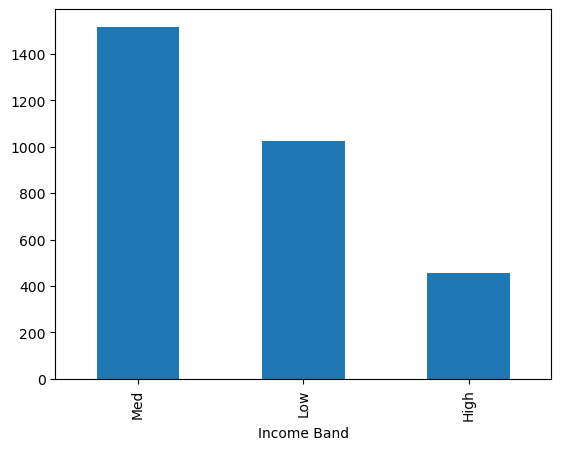

In [93]:
df["Income Band"].value_counts().plot(kind = "bar")

In [97]:
# Examine the distribution of unique categories in categorical columns
categorical_cols = df[["Banking Relationship","Gender","Investment Advisor Id","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns

for col in categorical_cols:
    print(f"\nValue Counts for '{col}' :")
    display(df[col].value_counts())


Value Counts for 'Banking Relationship' :


Banking Relationship
Private Bank     1352
Retail            660
Institutional     495
Commercial        493
Name: count, dtype: int64


Value Counts for 'Gender' :


Gender
Female    1512
Male      1488
Name: count, dtype: int64


Value Counts for 'Investment Advisor Id' :


Investment Advisor Id
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64


Value Counts for 'Amount of Credit Cards' :


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64


Value Counts for 'Nationality' :


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64


Value Counts for 'Occupation' :


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64


Value Counts for 'Fee Structure' :


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64


Value Counts for 'Loyalty Classification' :


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64


Value Counts for 'Properties Owned' :


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64


Value Counts for 'Risk Weighting' :


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64


Value Counts for 'Income Band' :


Income Band
Med     1517
Low     1027
High     456
Name: count, dtype: int64

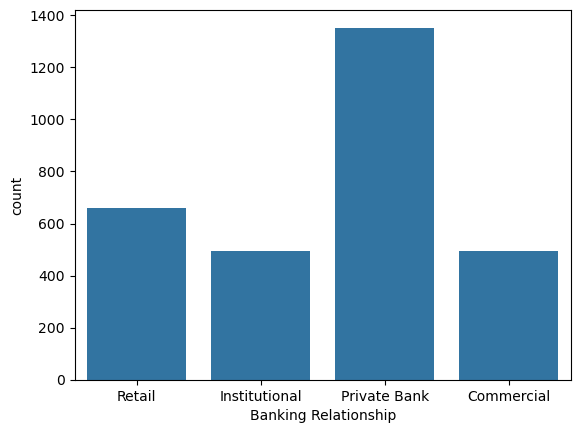

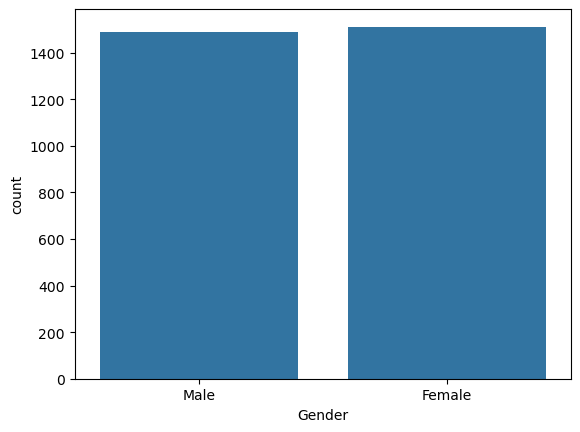

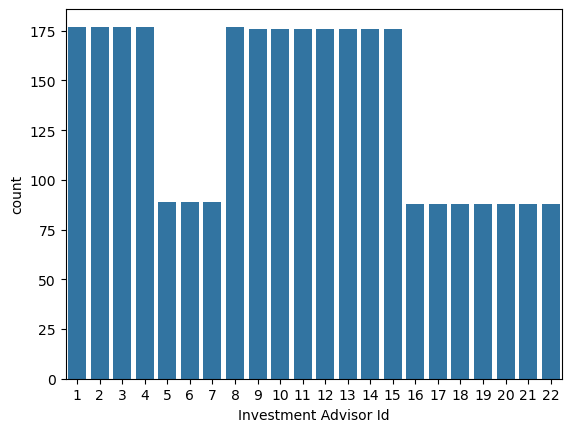

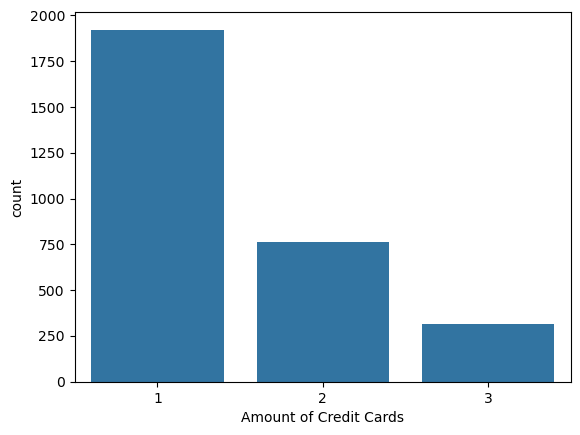

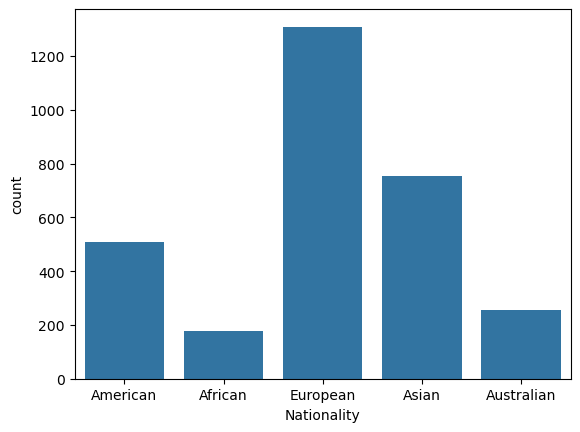

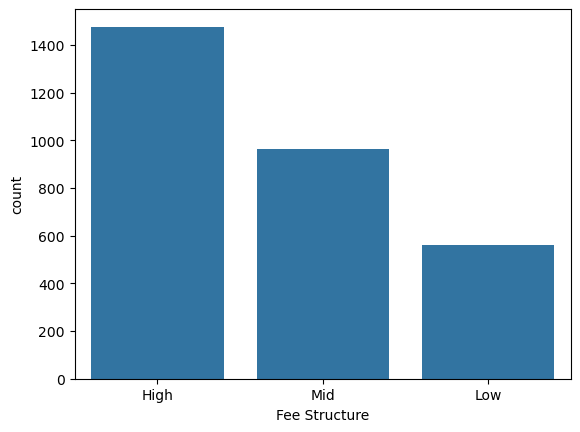

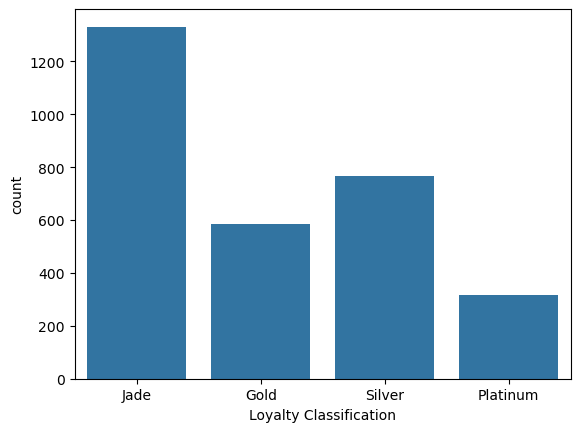

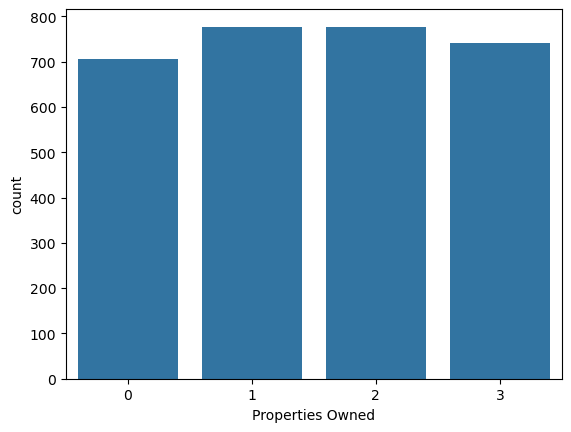

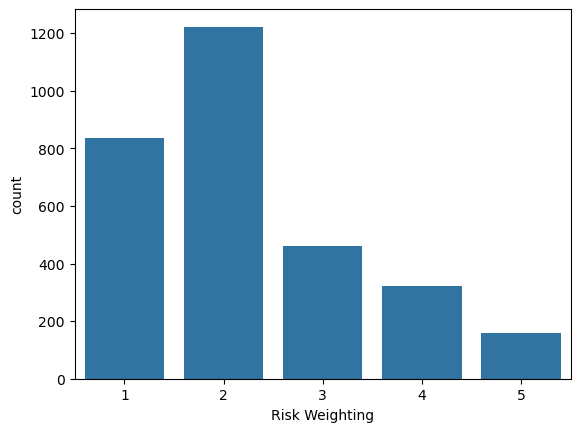

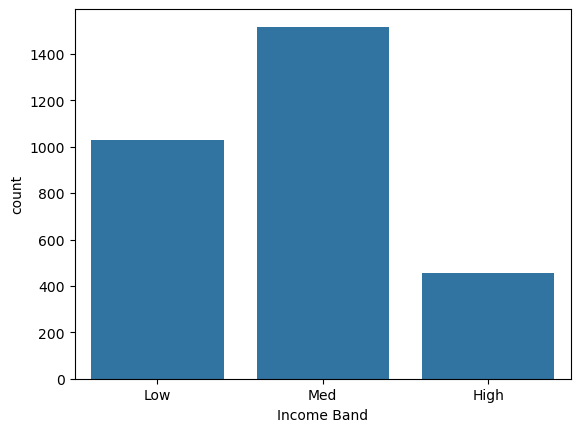

In [98]:
# Univariate Analysis: Analysing one column at time.
for i, predictor in enumerate(df[["Banking Relationship","Gender","Investment Advisor Id","Amount of Credit Cards","Nationality","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]]):
    plt.figure(i)
    sns.countplot(data = df, x=predictor)

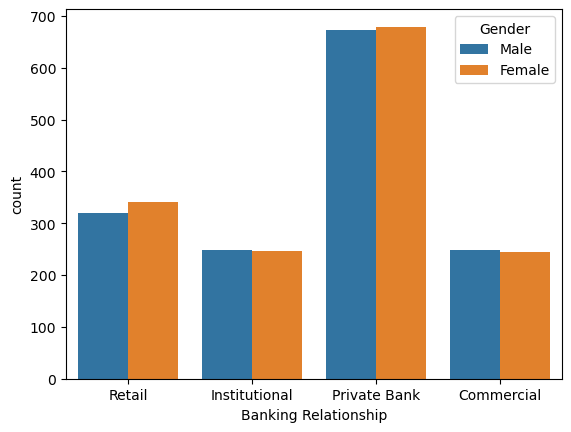

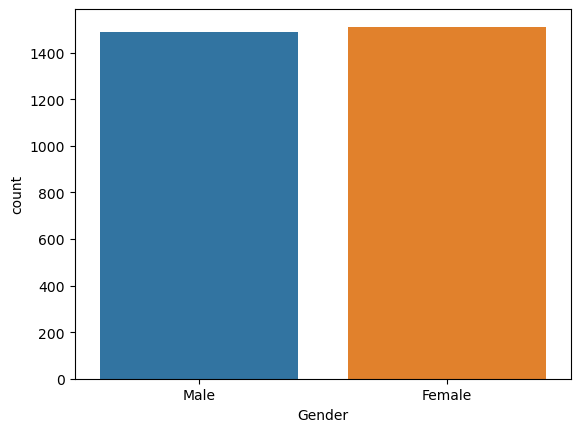

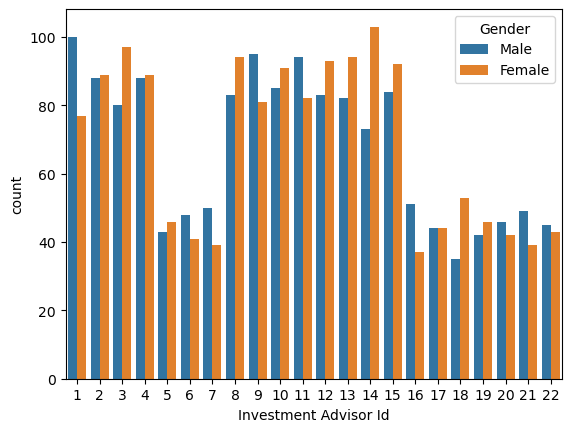

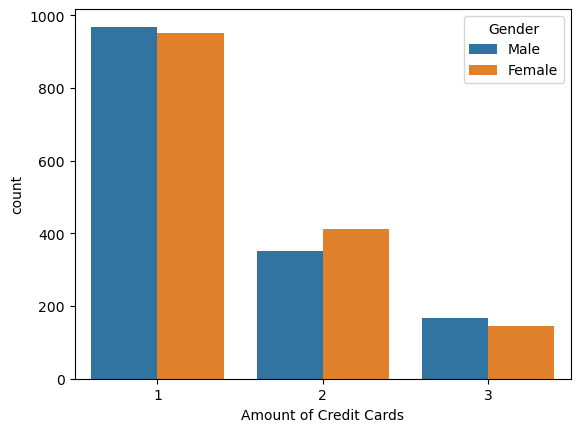

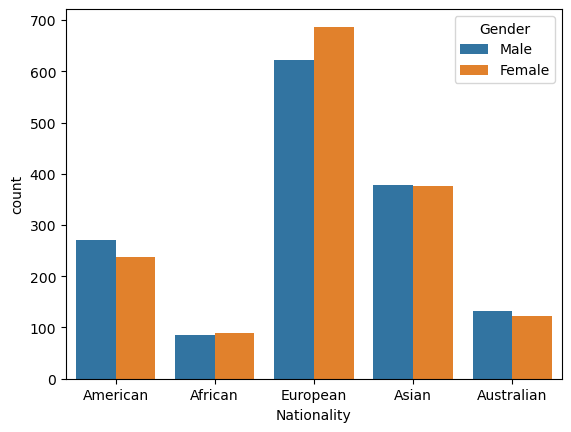

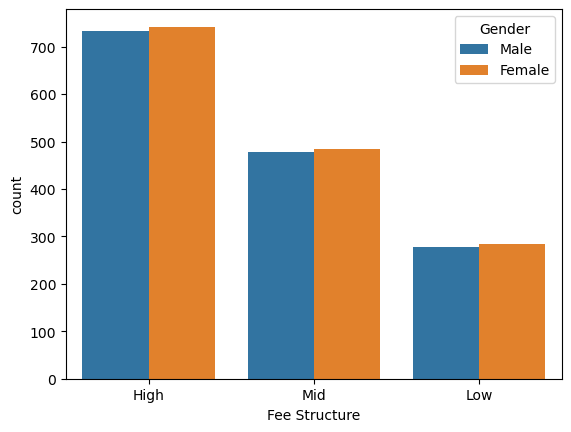

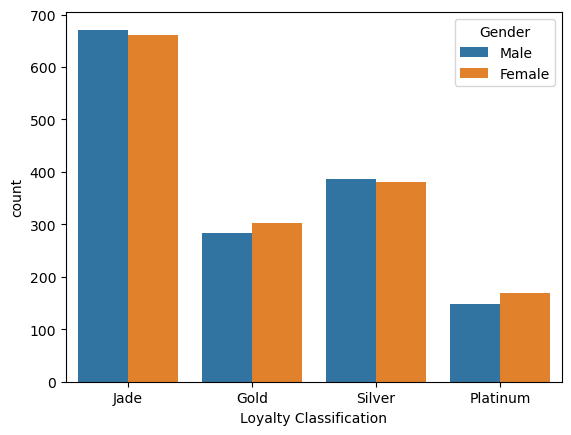

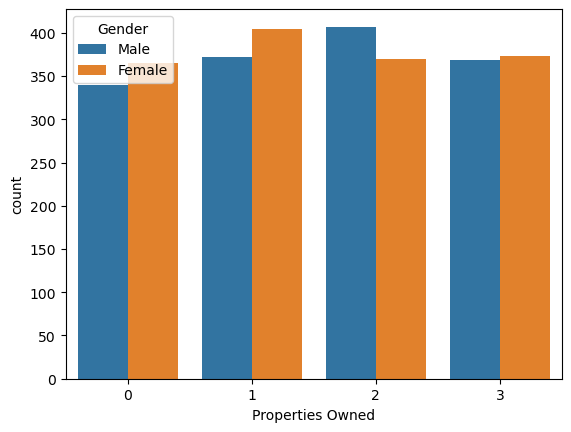

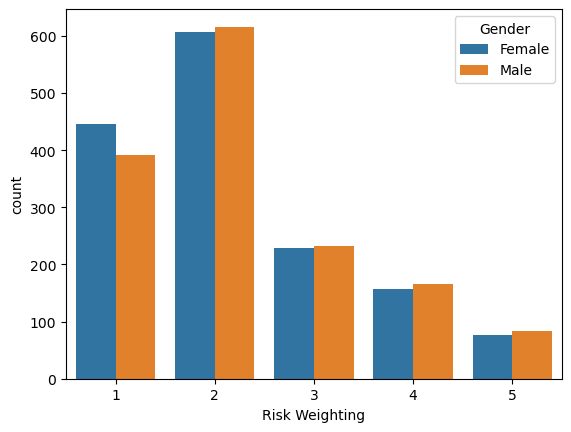

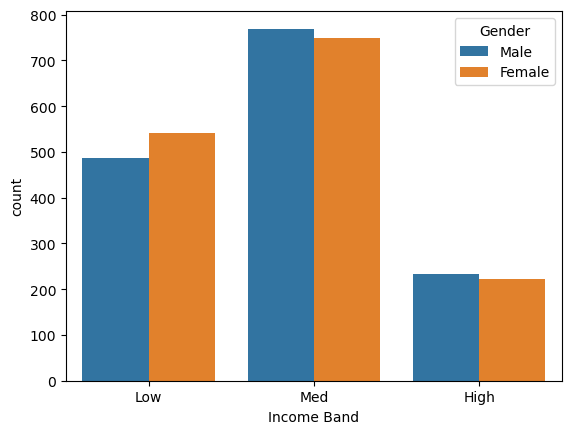

In [100]:
# Bivariate Analysis
for i, predictor in enumerate(df[["Banking Relationship","Gender","Investment Advisor Id","Amount of Credit Cards","Nationality","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]]):
    plt.figure(i)
    sns.countplot(data = df, x=predictor, hue="Gender")

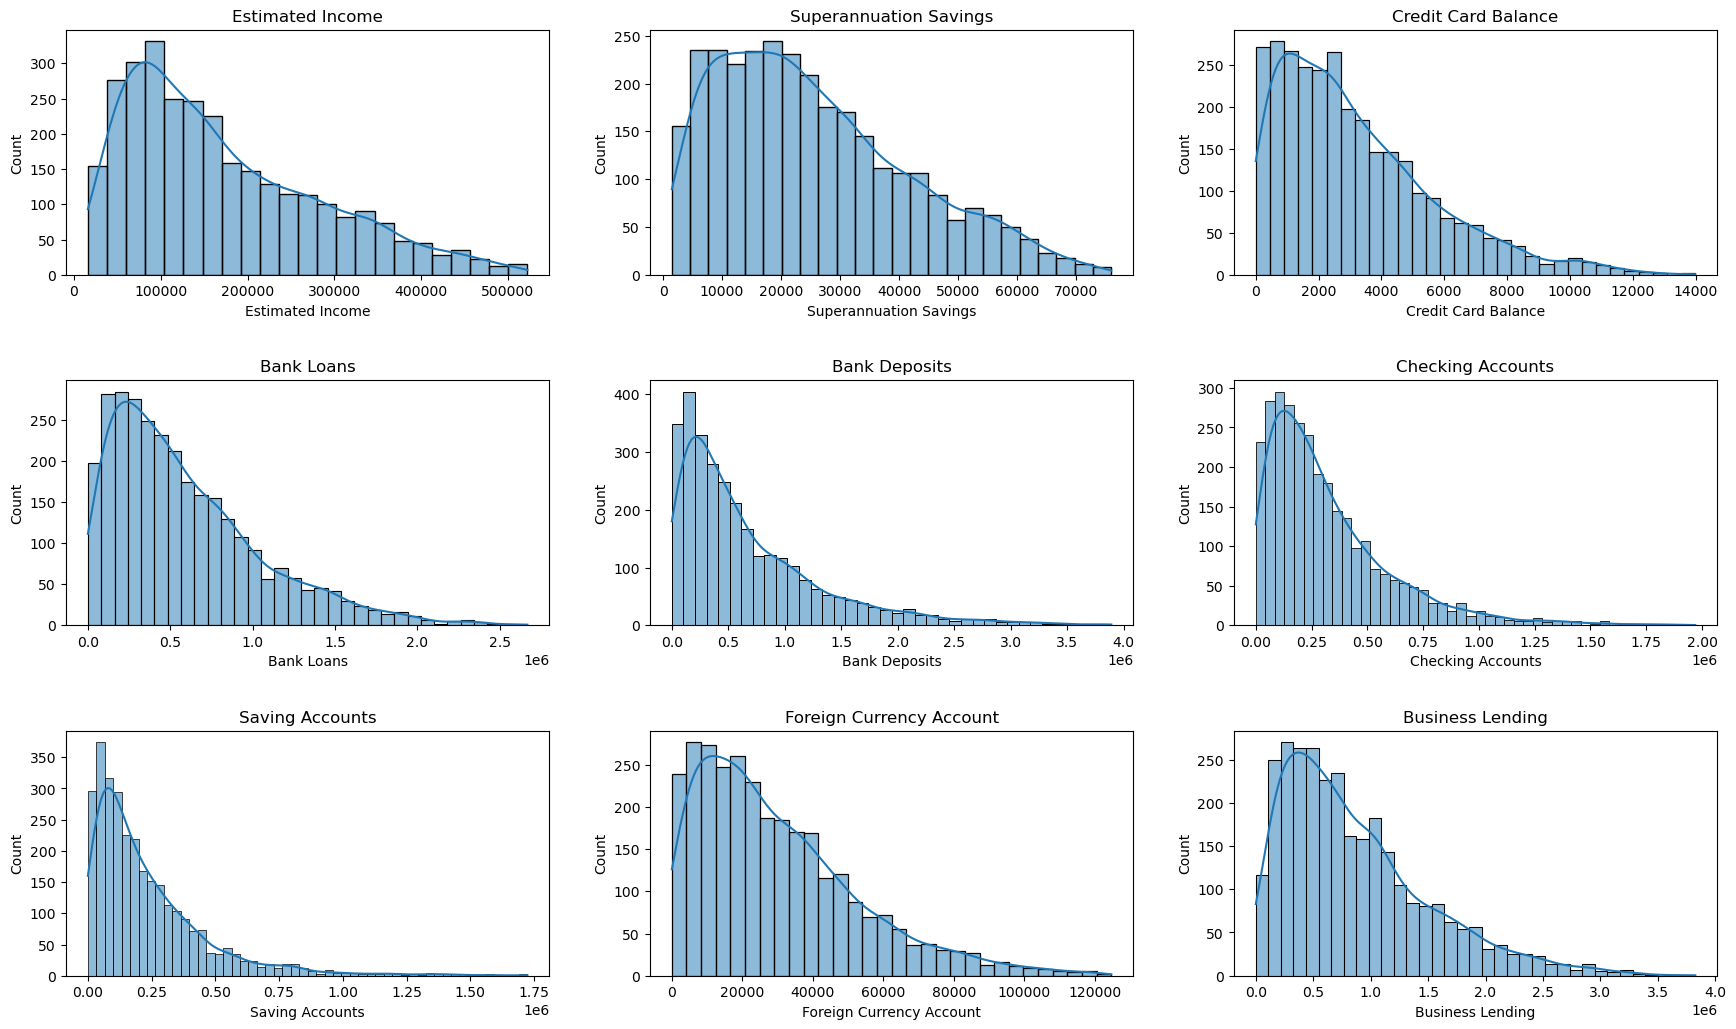

In [101]:
# Numerical Analysis
numerical_cols = df[["Estimated Income","Superannuation Savings","Credit Card Balance","Bank Loans","Bank Deposits","Checking Accounts","Saving Accounts","Foreign Currency Account","Business Lending"]]

# Univariate analysis and visualisation
plt.figure(figsize = (18,14))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.tight_layout(pad=3.0)
plt.show()

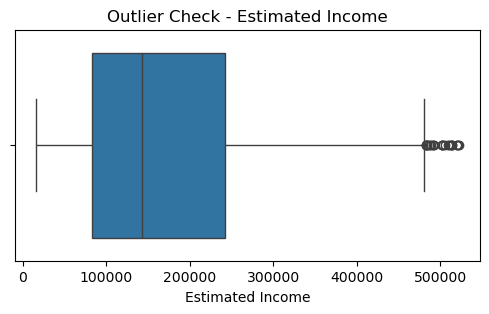

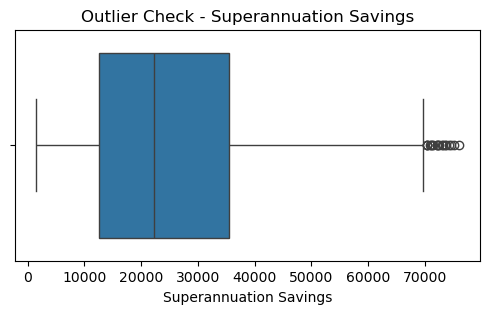

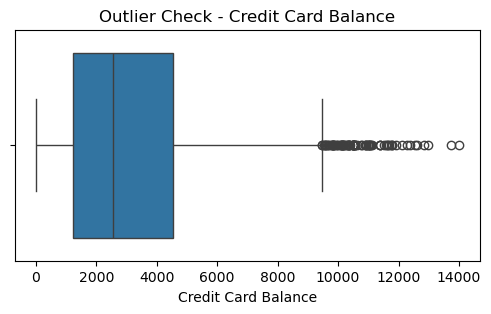

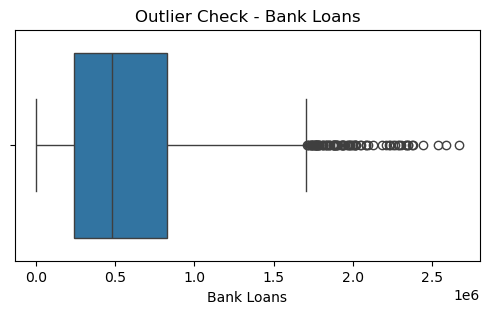

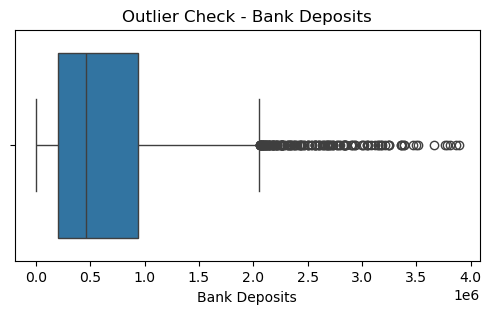

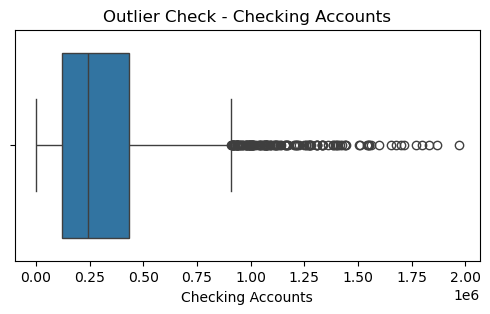

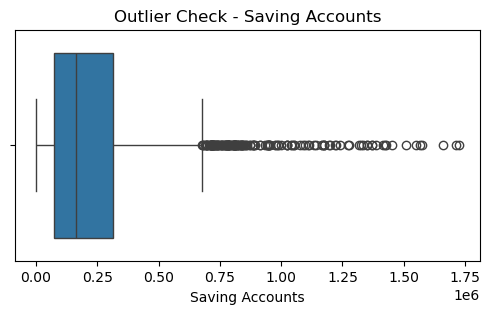

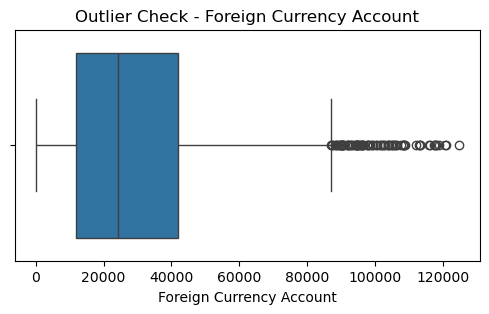

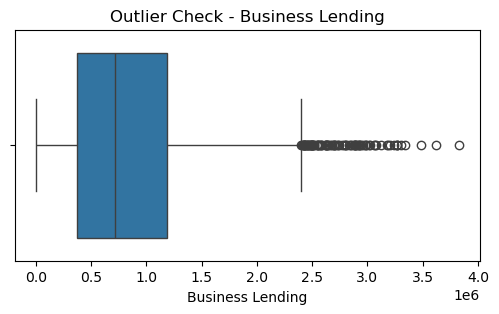

In [106]:
# Checking Outliers

for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Check - {col}')
    plt.show()

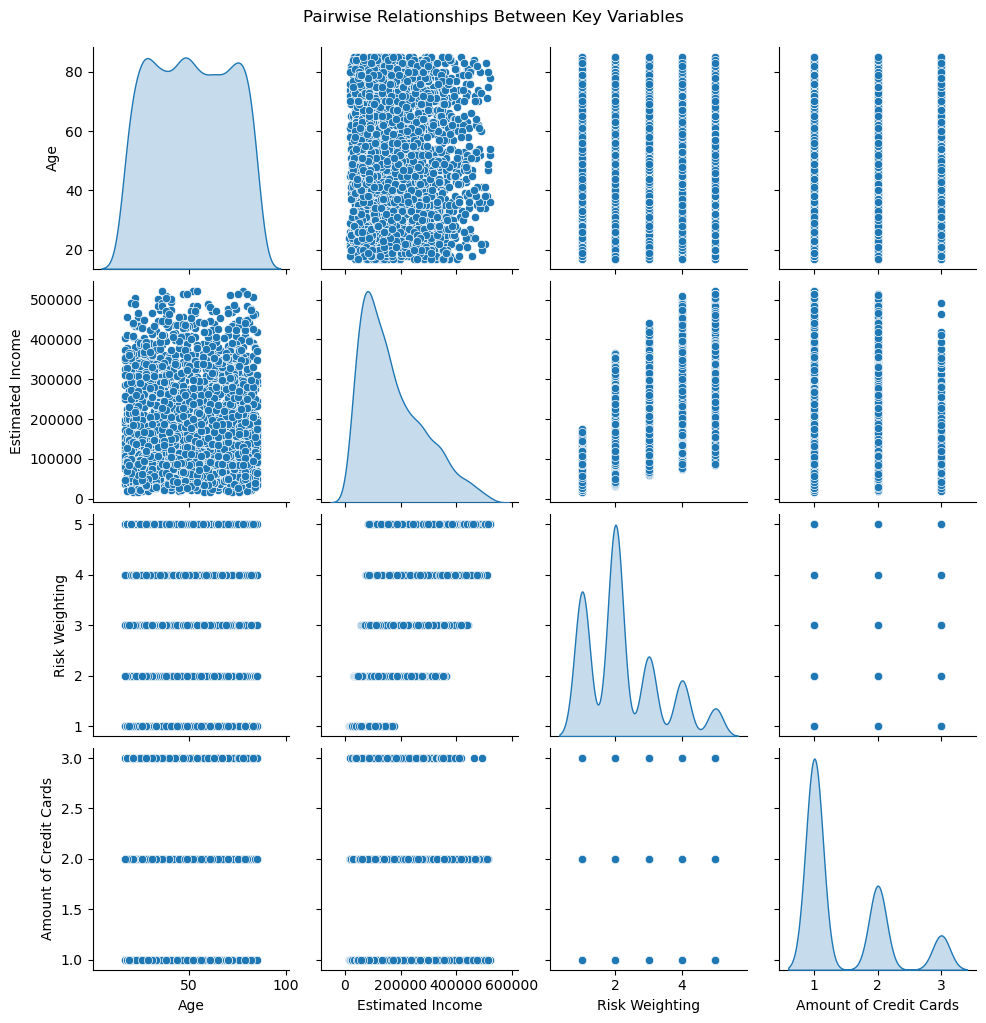

In [108]:
# Pairplot to explore relationships between key numeric variables

selected_cols = ['Age', 'Estimated Income', 'Risk Weighting', 'Amount of Credit Cards']
sns.pairplot(df[selected_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Key Variables', y=1.02)
plt.show()

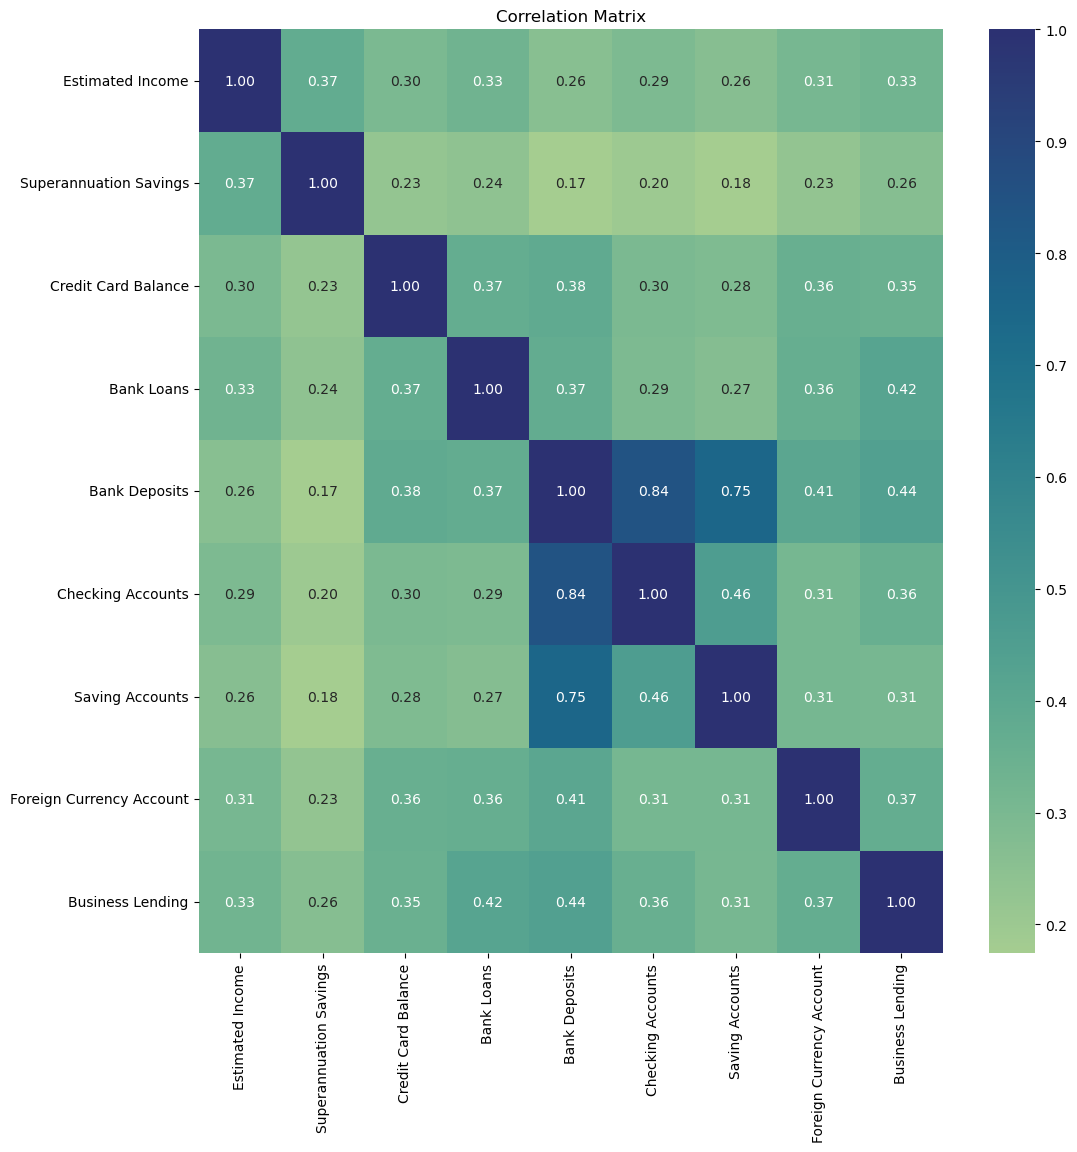

In [102]:
# Heatmaps

correlation_matrix = df[numerical_cols.columns].corr()

plt.figure(figsize = (12,12))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### EDA Summary (Simplified and Insight-Focused)

In this banking case study, we analyzed customer data to understand key patterns in demographics, income, and financial behavior.

🔹 Data Quality

The dataset had no missing values, which means it was clean and ready for analysis.
Column names and IDs (Gender, Branch, Advisor) were renamed or mapped for better clarity.

🔹 Categorical Insights (Univariate & Bivariate)

Majority of customers are male, but female clients are also well represented in some banking segments.
Most customers belong to the Retail and Institutional banking relationships.
The Private Banking segment, though smaller, likely represents high-income clients.
When compared by gender, males dominate most segments, especially in Retail Banking.

🔹 Numerical Insights

Estimated Income, Bank Deposits, and Superannuation Savings show a right-skewed distribution, meaning a few customers have very high amounts compared to the average.
Credit Card Balance and Bank Loans are moderately related — customers with higher credit card balances also tend to have more loans.
Estimated Income and Bank Deposits are strongly correlated — higher income clients usually maintain larger deposits.

🔹 Outliers & Correlations

Outliers were found in income and deposit values — likely from a few high-value or premium clients.
The correlation heatmap showed:
Strong positive relationships between Income, Deposits, and Savings.
Very low correlation between demographic variables (like Gender or Branch) and financial metrics — meaning financial patterns are more behavior-driven than demographic.

### Key Takeaways

1. The bank’s main customer base comes from Retail and Institutional segments.

2. High-income customers contribute most to deposits and savings.

3. Gender differences exist, but financial patterns are more influenced by income level than gender.

4. The dataset is clean, reliable, and ready for deeper modeling or segmentation analysis.